In [65]:
import catboost as cb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv("eukaryotes.csv") # Открытие файла
#data.head(10) Выборка с начала
#data.tail(10) Выборка с конца
#data.sample(5) Случайная выборка
#data.colname или data['colname'] Выводит колонку
#vr["GC%"].mean() Создает среднее значение
#data.columns=[''] Изменяет название колонок
#data.groupby('col() or sum() or sum()') Считает по колонке
#np.isnan(value) Выводит нан это или нет
#ps.isnull Работает со значениями пандаса
#data.col1.value_counts(dropna = false) Вслучае пустых значений выводим результат
#sum(pd.isnull(data.col2)) Ищет пустые значения
#data[data.level == 'Scaffolds'] Ищет в столбце названия строк
#data[data.level.isin (['Scaffolds', 'Chromosom'])] Ищет в столбце названия строк
#data.[['...', '...',...]].head() Выведит нужные колонки
#pd.concat([data.col1, data.col2], axis=1) Склеивание двух колонок одна за другой
#pd.merge() Склейка двух датафреймов
#data.columns = [x.upper().strip() for x is data.columns] 
#data['Level'] = data['Level'].apply(lambda x: x.strip()) Убирает лидирующий или последний пробел

In [67]:
data.head(10)

#Organism Name                    Organism Groups    Strain  \
0   Emiliania huxleyi CCMP1516  Eukaryota;Protists;Other Protists  CCMP1516   
1         Arabidopsis thaliana       Eukaryota;Plants;Land Plants       NaN   
2          Medicago truncatula       Eukaryota;Plants;Land Plants       A17   
3                  Glycine max       Eukaryota;Plants;Land Plants       NaN   
4         Solanum lycopersicum       Eukaryota;Plants;Land Plants       NaN   
5              Hordeum vulgare       Eukaryota;Plants;Land Plants       NaN   
6  Oryza sativa Japonica Group       Eukaryota;Plants;Land Plants       NaN   
7            Triticum aestivum       Eukaryota;Plants;Land Plants       NaN   
8                     Zea mays       Eukaryota;Plants;Land Plants       NaN   
9     Pneumocystis carinii B80        Eukaryota;Fungi;Ascomycetes       B80   

      BioSample   BioProject         Assembly        Level     Size(Mb)  \
0  SAMN02744062   PRJNA77753  GCA_000372725.1     Scaffold    167.67600   
1  SAMN03081427   PRJNA10719  GCA_000001735.1   Chromosome    119.66800   
2  SAMN02299339   PRJNA10791  GCA_000219495.2   Chromosome    412.92400   
3  SAMN00002965   PRJNA19861  GCA_000004515.3   Chromosome    978.97200   
4  SAMN02981290     PRJNA119  GCA_000188115.2   Chromosome    823.78600   
5  SAMEA3903302   PRJEB13020  GCA_900075435.2     Scaffold   9788.86000   
6  SAMD00000397   PRJNA12269  GCA_001433935.1   Chromosome    374.42300   
7  SAMN07284949  PRJNA392179  GCA_002220415.2       Contig  15344.70000   
8  SAMN04296295   PRJNA10769  GCA_000005005.6   Chromosome   2135.08000   
9  SAMN02380717  PRJNA223511  GCA_001477545.1       Contig      7.66146   

       GC%                                          Replicons     WGS  \
0  64.5000                                                NaN  AHAL01   
1  36.0528  chromosome 1:NC_003070.9/CP002684.1; chromosom...     NaN   
2  34.0470  chromosome 1:NC_016407.2/CM001217.2; chromosom...  APNO01   
3  35.1208  chromosome 1:NC_016088.2/CM000834.2; chromosom...  ACUP02   
4  35.7097  chromosome 1:NC_015438.2/CM001064.2; chromosom...  AEKE02   
5   0.0000                                                NaN  FJWB02   
6  43.5769  chromosome 1:NC_029256.1/AP014957.1; chromosom...     NaN   
7  46.1000                                                NaN  NMPL02   
8  46.9109  chromosome 1:NC_024459.2/CM007647.1; chromosom...  LPUQ01   
9  27.8000                                                NaN  LFVZ01   

   Scaffolds    CDS          Release Date  \
0       7795  38554  2013-04-19T00:00:00Z   
1          7  48350  2001-08-13T00:00:00Z   
2       2187  57661  2011-08-12T00:00:00Z   
3       1191  71525  2010-01-05T00:00:00Z   
4       3224  36010  2010-12-10T00:00:00Z   
5      72295      0  2016-08-25T00:00:00Z   
6         58  41070  2015-10-10T00:00:00Z   
7     279439      0  2017-07-13T00:00:00Z   
8        598  58411  2010-01-29T00:00:00Z   
9         62   3646  2015-12-22T00:00:00Z   

                                         GenBank FTP  \
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
5  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...   
6  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
7  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
8  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
9  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   

                                          RefSeq FTP  
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
5                                                NaN  
6  ftp://ftp.ncbi.

In [68]:
data.shape

(5131, 16)

In [69]:
data.loc[6, 'Level']

' Chromosome'

In [70]:
data['Level'] = data['Level'].apply(lambda x: x.strip())
data.loc[1, 'Level']

'Chromosome'

In [71]:
data.Strain

0                                  CCMP1516
1                                       NaN
2                                       A17
3                                       NaN
4                                       NaN
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                       B80
10                                    972h-
11                                    S288C
12                               ATCC 20696
13                                   SC5314
14                                  FGSC A4
15                                    Af293
16                                    OR74A
17                                 Friedlin
18                                CL Brener
19                                    WB C6
20                                HM-1:IMSS
21      Dal 972 clone 1 (MHOM/CI/86/DAL972)
22                              

In [72]:
pd.isnull(data.Strain)

0       False
1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5101    False
5102    False
5103    False
5104    False
5105    False
5106    False
5107    False
5108    False
5109    False
5110    False
5111    False
5112    False
5113    False
5114    False
5115    False
5116    False
5117    False
5118    False
5119    False
5120    False
5121    False
5122    False
5123    False
5124    False
5125    False
5126     True
5127    False
5128    False
5129    False
5130    False
Name: Strain, Length: 5131, dtype: bool

In [73]:
data.Strain.value_counts(dropna = False)

NaN                                 969
Race 77                              14
CHM1                                 11
EU2                                   7
Clinical                              7
EU1                                   7
DAOM 197198w                          7
CHM13                                 6
Houghton                              6
NA19240                               4
W303                                  4
1                                     3
mixed                                 3
SC5314                                3
Weihenstephan 34/70                   3
KSC_2009_1                            3
Tuebingen                             3
4287                                  3
FJ81278                               3
ATCC 42132                            3
S                                     3
FL                                    3
C57BL/6J                              3
BF01                                  3
Texas                                 3


In [74]:
data.columns

Index(['#Organism Name', 'Organism Groups', 'Strain', 'BioSample',
       'BioProject', 'Assembly', 'Level', 'Size(Mb)', 'GC%', 'Replicons',
       'WGS', 'Scaffolds', 'CDS', 'Release Date', 'GenBank FTP', 'RefSeq FTP'],
      dtype='object')

In [75]:
data.columns = ['Organism_Name', 'Organism Groups', 'Strain', 'BioSample',
       'BioProject', 'Assembly', 'Level', 'Size(Mb)', 'GC%', 'Replicons',
       'WGS', 'Scaffolds', 'CDS', 'Release Date', 'GenBank FTP', 'RefSeq FTP']

In [76]:
data.head()

Organism_Name                    Organism Groups    Strain  \
0  Emiliania huxleyi CCMP1516  Eukaryota;Protists;Other Protists  CCMP1516   
1        Arabidopsis thaliana       Eukaryota;Plants;Land Plants       NaN   
2         Medicago truncatula       Eukaryota;Plants;Land Plants       A17   
3                 Glycine max       Eukaryota;Plants;Land Plants       NaN   
4        Solanum lycopersicum       Eukaryota;Plants;Land Plants       NaN   

      BioSample  BioProject         Assembly       Level  Size(Mb)      GC%  \
0  SAMN02744062  PRJNA77753  GCA_000372725.1    Scaffold   167.676  64.5000   
1  SAMN03081427  PRJNA10719  GCA_000001735.1  Chromosome   119.668  36.0528   
2  SAMN02299339  PRJNA10791  GCA_000219495.2  Chromosome   412.924  34.0470   
3  SAMN00002965  PRJNA19861  GCA_000004515.3  Chromosome   978.972  35.1208   
4  SAMN02981290    PRJNA119  GCA_000188115.2  Chromosome   823.786  35.7097   

                                           Replicons     WGS  Scaffolds  \
0                                                NaN  AHAL01       7795   
1  chromosome 1:NC_003070.9/CP002684.1; chromosom...     NaN          7   
2  chromosome 1:NC_016407.2/CM001217.2; chromosom...  APNO01       2187   
3  chromosome 1:NC_016088.2/CM000834.2; chromosom...  ACUP02       1191   
4  chromosome 1:NC_015438.2/CM001064.2; chromosom...  AEKE02       3224   

     CDS          Release Date  \
0  38554  2013-04-19T00:00:00Z   
1  48350  2001-08-13T00:00:00Z   
2  57661  2011-08-12T00:00:00Z   
3  71525  2010-01-05T00:00:00Z   
4  36010  2010-12-10T00:00:00Z   

                                         GenBank FTP  \
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   

                                          RefSeq FTP  
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...

In [77]:
data[['Strain', 'Level']].head(10)

Strain       Level
0  CCMP1516    Scaffold
1       NaN  Chromosome
2       A17  Chromosome
3       NaN  Chromosome
4       NaN  Chromosome
5       NaN    Scaffold
6       NaN  Chromosome
7       NaN      Contig
8       NaN  Chromosome
9       B80      Contig

In [78]:
pd.concat([data.Strain, data.Level], axis=0)

0                                  CCMP1516
1                                       NaN
2                                       A17
3                                       NaN
4                                       NaN
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                       B80
10                                    972h-
11                                    S288C
12                               ATCC 20696
13                                   SC5314
14                                  FGSC A4
15                                    Af293
16                                    OR74A
17                                 Friedlin
18                                CL Brener
19                                    WB C6
20                                HM-1:IMSS
21      Dal 972 clone 1 (MHOM/CI/86/DAL972)
22                              

In [79]:
data[data.Level == 'Scaffold'].sample(5)

Organism_Name                    Organism Groups  \
3396  Coccidioides immitis RMSCC 2394        Eukaryota;Fungi;Ascomycetes   
1421          Amphilophus citrinellus           Eukaryota;Animals;Fishes   
3158   Hyaloperonospora arabidopsidis  Eukaryota;Protists;Other Protists   
2459            Geotrichum fermentans        Eukaryota;Fungi;Ascomycetes   
3605               [Candida] boidinii        Eukaryota;Fungi;Ascomycetes   

          Strain     BioSample   BioProject         Assembly     Level  \
3396  RMSCC 2394  SAMN02953671   PRJNA17713  GCA_000149895.1  Scaffold   
1421         NaN  SAMEA2698536    PRJEB6974  GCA_000751415.1  Scaffold   
3158       Cala2  SAMN04124420  PRJNA297499  GCA_001414265.1  Scaffold   
2459   CICC 1368  SAMN03777305  PRJNA287202  GCA_002233575.1  Scaffold   
3605    TOMC-Y13  SAMN06191595  PRJNA359406  GCA_002007995.1  Scaffold   

      Size(Mb)   GC% Replicons     WGS  Scaffolds    CDS  \
3396   28.9084  46.2       NaN  AATX01         31  10408   
1421  844.9030  41.4       NaN  CCOE01       6637      0   
3158   70.2575  47.3       NaN  LKIA01       9283      0   
2459   31.2783  58.0       NaN  LFTX01       3822      0   
3605   18.9761  31.0       NaN  MSRZ01        857   4991   

              Release Date                                        GenBank FTP  \
3396  2006-11-02T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
1421  2014-09-06T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3158  2015-10-27T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
2459  2017-07-25T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
3605  2017-02-28T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   

     RefSeq FTP  
3396        NaN  
1421        NaN  
3158        NaN  
2459        NaN  
3605        NaN

In [80]:
data[data.Level.isin (['Scaffold', 'Chromosome'])].sample(10)

Organism_Name                   Organism Groups  \
3321       Leishmania major strain SD 75.1   Eukaryota;Protists;Kinetoplasts   
3825               Sclerotinia homoeocarpa       Eukaryota;Fungi;Ascomycetes   
4731              Saccharomyces cerevisiae       Eukaryota;Fungi;Ascomycetes   
3798                    Beauveria bassiana       Eukaryota;Fungi;Ascomycetes   
1562                    Trichinella papuae      Eukaryota;Animals;Roundworms   
704                      Citrus clementina      Eukaryota;Plants;Land Plants   
2503                Chlamydomonas eustigma      Eukaryota;Plants;Green Algae   
3540  Rhizophagus irregularis DAOM 197198w       Eukaryota;Fungi;Other Fungi   
4535                      Candida albicans       Eukaryota;Fungi;Ascomycetes   
2489                   Eimeria falciformis  Eukaryota;Protists;Apicomplexans   

                    Strain     BioSample   BioProject         Assembly  \
3321               SD 75.1  SAMN02953800   PRJNA50303  GCA_000250755.2   
3825                 CPB17  SAMN03792986  PRJNA288032  GCA_002242865.1   
4731               T.52_3C  SAMN02770301  PRJNA247448  GCA_001669905.1   
3798            ARSEF 4305  SAMN03175168  PRJNA260878  GCA_001684225.1   
1562               ISS1980  SAMN02949504  PRJNA257433  GCA_001447755.1   
704                    NaN  SAMN02389527  PRJNA223006  GCA_000493195.1   
2503             NIES-2499  SAMD00071608    PRJDB5468  GCA_002335675.1   
3540          DAOM 197198w  SAMN02422731  PRJNA230015  GCA_000597565.1   
4535           UAB040-W3D3  SAMN06854471  PRJNA384935  GCA_002259885.1   
2489  Bayer Haberkorn 1970  SAMN02483514  PRJNA232109  GCA_002271815.1   

           Level  Size(Mb)      GC%  \
3321    Scaffold   31.2428  59.5000   
3825    Scaffold   36.3963  46.6000   
4731  Chromosome   12.1311  38.6048   
3798    Scaffold   34.7687  49.5000   
1562    Scaffold   46.8445  32.7000   
704     Scaffold  301.3650  35.2000   
2503    Scaffold   66.6295  43.7000   
3540    Scaffold   90.4056  27.4000   
4535    Scaffold   14.9816  31.5000   
2489    Scaffold   43.6713  47.5827   

                                              Replicons     WGS  Scaffolds  \
3321                                                NaN  AFZI01         36   
3825                                                NaN  LLKJ01       3875   
4731  chromosome I:CP007811.1; chromosome II:CP00781...     NaN         17   
3798                                                NaN  JTCY01       1694   
1562                                                NaN  JYDO01       2542   
704                                                 NaN  AMZM01       1398   
2503                                                NaN  BEGY01        520   
3540                                                NaN  JAQW01      15659   
4535                                                NaN  NETO01        225   
2489                         apicoplast Pltd:CM008276.1  NPHX01        753   

        CDS          Release Date  \
3321      0  2012-02-28T00:00:00Z   
3825      0  2017-08-07T00:00:00Z   
4731      0  2016-06-20T00:00:00Z   
3798      0  2016-07-12T00:00:00Z   
1562  16247  2015-11-24T00:00:00Z   
704   34557  2013-10-30T00:00:00Z   
2503  14161  2017-09-01T00:00:00Z   
3540      0  2014-02-10T00:00:00Z   
4535      0  2017-08-18T00:00:00Z   
2489      0  2017-08-14T00:00:00Z   

                                            GenBank FTP  \
3321  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3825  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
4731  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
3798  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
1562  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
704   ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2503  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
3540  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4535  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
2489  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/G

In [81]:
data[data["GC%"] > 70]

Organism_Name               Organism Groups    Strain  \
2620  Prototheca stagnorum  Eukaryota;Plants;Green Algae  JCM 9641   

         BioSample BioProject         Assembly     Level  Size(Mb)   GC%  \
2620  SAMD00028436  PRJDB3715  GCA_002794665.1  Scaffold   16.8962  71.4   

     Replicons     WGS  Scaffolds  CDS          Release Date  \
2620       NaN  BCJY01         27    0  2017-11-16T00:00:00Z   

                                            GenBank FTP RefSeq FTP  
2620  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...        NaN

(array([131.,   1.,   0.,   0.,   0.,   1.,   2.,   9.,  22.,  58.,  48.,
         56., 118., 214., 286., 304., 835., 642., 356., 403., 569., 432.,
        284., 177.,  95.,  43.,  33.,   8.,   3.,   1.]),
 array([ 0.  ,  2.38,  4.76,  7.14,  9.52, 11.9 , 14.28, 16.66, 19.04,
        21.42, 23.8 , 26.18, 28.56, 30.94, 33.32, 35.7 , 38.08, 40.46,
        42.84, 45.22, 47.6 , 49.98, 52.36, 54.74, 57.12, 59.5 , 61.88,
        64.26, 66.64, 69.02, 71.4 ]),
 <a list of 30 Patch objects>)

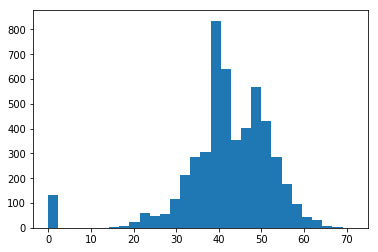

In [82]:
plt.hist(data["GC%"], bins = 30)

In [83]:
pr = pd.read_csv("prokaryotes.csv")

In [84]:
pr[pr["GC%"] > 5].sample(5)

#Organism Name  \
2043   Stenotrophomonas nitritireducens   
637   Escherichia fergusonii ATCC 35469   
2563              Streptomyces alfalfae   
9265                 Streptococcus suis   
3934                   Bacillus sp. WP8   

                                  Organism Groups       Strain      BioSample  \
2043  Bacteria;Proteobacteria;Gammaproteobacteria         2001   SAMN05428703   
637   Bacteria;Proteobacteria;Gammaproteobacteria  ATCC 35469T   SAMEA3138228   
2563  Bacteria;Terrabacteria group;Actinobacteria    ACCC40021   SAMN04955000   
9265      Bacteria;Terrabacteria group;Firmicutes         LS9N  SAMEA19981168   
3934      Bacteria;Terrabacteria group;Firmicutes          WP8   SAMN03217316   

       BioProject         Assembly     Level  Size(Mb)      GC%  \
2043  PRJNA330867  GCA_001700965.1  Complete   4.54173  63.8000   
637    PRJNA33369  GCA_000026225.1  Complete   4.64386  49.8834   
2563  PRJNA320684  GCA_001975025.1  Complete   8.62587  72.1000   
9265    PRJEB8392  GCA_900143575.1  Complete   2.56164  41.4000   
3934  PRJNA268247  GCA_000800825.1  Complete   3.70889  41.6000   

                                              Replicons  WGS  Scaffolds   CDS  \
2043                chromosome:NZ_CP016756.1/CP016756.1  NaN          1  3786   
637   chromosome:NC_011740.1/CU928158.2; plasmid pEF...  NaN          2  4349   
2563                chromosome:NZ_CP015588.1/CP015588.1  NaN          1  7062   
9265                            chromosome I:LT671674.1  NaN          1     0   
3934                chromosome:NZ_CP010075.1/CP010075.1  NaN          1  3639   

              Release Date                                        GenBank FTP  \
2043  2016-08-09T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
637   2008-12-16T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2563  2017-01-30T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
9265  2016-12-09T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/900...   
3934  2014-12-11T00:00:00Z  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   

                                             RefSeq FTP  
2043  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...  
637   ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
2563  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001...  
9265  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900...  
3934  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...

In [85]:
pr[pr["GC%"] < 20]

#Organism Name  \
467         Candidatus Carsonella ruddii PC isolate NHV   
865                Candidatus Zinderia insecticola CARI   
1694  Candidatus Nasuia deltocephalinicola str. NAS-ALF   
2513                Enterobacteriaceae bacterium NZ1215   
2690               Candidatus Nasuia deltocephalinicola   
3128                    Candidatus Carsonella ruddii PV   
3594   Candidatus Carsonella ruddii CE isolate Thao2000   
3626                        Fusobacterium periodonticum   
3831               Candidatus Nasuia deltocephalinicola   
4034   Candidatus Carsonella ruddii CS isolate Thao2000   
4374   Candidatus Carsonella ruddii HC isolate Thao2000   
4386      Pectobacterium carotovorum subsp. brasiliense   
4543                              Prevotella intermedia   
4573   Candidatus Carsonella ruddii HT isolate Thao2000   
4852                    Candidatus Carsonella ruddii DC   
4939                              Prevotella intermedia   
4952                        Fusobacterium periodonticum   
4955                       Candidatus Carsonella ruddii   
5191                       Candidatus Carsonella ruddii   
5193                        Fusobacterium periodonticum   
5205                              Prevotella intermedia   
5244                              Prevotella intermedia   
5513                              Prevotella intermedia   
5635           Fusobacterium nucleatum subsp. vincentii   
5709                              Prevotella intermedia   
5799                Pseudomonas syringae pv. actinidiae   

                                      Organism Groups      Strain  \
467       Bacteria;Proteobacteria;Gammaproteobacteria          PC   
865        Bacteria;Proteobacteria;Betaproteobacteria        CARI   
1694       Bacteria;Proteobacteria;Betaproteobacteria         ALF   
2513      Bacteria;Proteobacteria;Gammaproteobacteria      NZ1215   
2690       Bacteria;Proteobacteria;Betaproteobacteria        PUNC   
3128      Bacteria;Proteobacteria;Gammaproteobacteria          PV   
3594      Bacteria;Proteobacteria;Gammaproteobacteria          CE   
3626              Bacteria;Fusobacteria;Fusobacteriia   KCOM 1261   
3831       Bacteria;Proteobacteria;Betaproteobacteria        ENCA   
4034      Bacteria;Proteobacteria;Gammaproteobacteria          CS   
4374      Bacteria;Proteobacteria;Gammaproteobacteria          HC   
4386      Bacteria;Proteobacteria;Gammaproteobacteria       BZA12   
4543  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 2033   
4573      Bacteria;Proteobacteria;Gammaproteobacteria          HT   
4852      Bacteria;Proteobacteria;Gammaproteobacteria          DC   
4939  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 1949   
4952              Bacteria;Fusobacteria;Fusobacteriia   KCOM 2555   
4955      Bacteria;Proteobacteria;Gammaproteobacteria        YCCR   
5191      Bacteria;Proteobacteria;Gammaproteobacteria          BC   
5193              Bacteria;Fusobacteria;Fusobacteriia   KCOM 1262   
5205  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 2837   
5244  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 2838   
5513  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 1741   
5635              Bacteria;Fusobacteria;Fusobacteriia   KCOM 2931   
5709  Bacteria;FCB group;Bacteroidetes/Chlorobi group   KCOM 1944   
5799      Bacteria;Proteobacteria;Gammaproteobacteria  MAFF212063   

         BioSample   BioProject         Assembly     Level  Size(Mb)   GC%  \
467   SAMN02641651  PRJNA165191  GCA_000287315.1  Complete  0.159923  15.6   
865   SAMN02604227   PRJNA51243  GCA_000147015.1  Complete  0.208564  13.5   
1694  SAMN02641653  PRJNA206993  GCA_000442605.1  Complete  0.112091  17.1   
2513  SAMN07758087  PRJNA413589  GCA_002688505.1  Complete  0.271175  15.4   
2690  SAMN04223555  PRJNA300484  GCA_001447885.1  Complete  0.112031  16.6   
3128  SAMD00061085   PRJNA17977  GCA_000010365.1  Complete  0.159662  16.6   
3594  SAMN02641648  PRJNA165179  GCA_

(array([  12.,    0.,    0.,    0.,    0.,    6.,    6.,    2.,    8.,
          52.,  125.,  281.,  390.,  427.,  574.,  989.,  537.,  398.,
         447.,  262., 1237.,  265.,  542.,  335.,  404.,  426.,  664.,
         726.,  158.,   78.]),
 array([ 0.        ,  2.49666667,  4.99333333,  7.49      ,  9.98666667,
        12.48333333, 14.98      , 17.47666667, 19.97333333, 22.47      ,
        24.96666667, 27.46333333, 29.96      , 32.45666667, 34.95333333,
        37.45      , 39.94666667, 42.44333333, 44.94      , 47.43666667,
        49.93333333, 52.43      , 54.92666667, 57.42333333, 59.92      ,
        62.41666667, 64.91333333, 67.41      , 69.90666667, 72.40333333,
        74.9       ]),
 <a list of 30 Patch objects>)

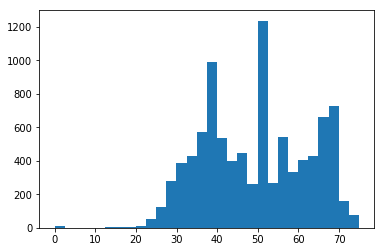

In [86]:
plt.hist(pr["GC%"], bins = 30)

In [87]:
vr = pd.read_csv("viruses.csv")

In [89]:
vr[vr["GC%"] > 5].sample(10)

#Organism Name  \
2737                  Pseudomonas phage JBD69   
6987                              Rotavirus A   
354   Ageratum yellow leaf curl betasatellite   
5902                              Rotavirus A   
2850                 Spheniscid herpesvirus 2   
3831               Mycobacterium phage Elph10   
1619           Mycobacterium phage Graduation   
4234                    Gordonia phage Jeanie   
3735         Streptomyces phage BryanRecycles   
216                     Kappapapillomavirus 2   

                                        Organism Groups     BioSample  \
2737   Viruses;dsDNA viruses, no RNA stage;Siphoviridae           NaN   
6987                   Viruses;dsRNA viruses;Reoviridae           NaN   
354               Viruses;Satellites;Tolecusatellitidae           NaN   
5902                   Viruses;dsRNA viruses;Reoviridae           NaN   
2850  Viruses;dsDNA viruses, no RNA stage;Herpesviridae  SAMEA4383695   
3831   Viruses;dsDNA viruses, no RNA stage;Siphoviridae           NaN   
1619   Viruses;dsDNA viruses, no RNA stage;Siphoviridae           NaN   
4234   Viruses;dsDNA viruses, no RNA stage;Siphoviridae           NaN   
3735   Viruses;dsDNA viruses, no RNA stage;Siphoviridae           NaN   
216   Viruses;dsDNA viruses, no RNA stage;Papillomav...           NaN   

       BioProject         Assembly     Level  Size(Mb)      GC%  \
2737  PRJNA343522  GCA_001736375.1  Complete  0.036938  63.9000   
6987          NaN  GCA_002674915.1  Complete  0.018053  31.7469   
354    PRJNA14439  GCA_000846445.1  Complete  0.001351  36.0000   
5902          NaN  GCA_002653055.1  Complete  0.018030  31.7528   
2850   PRJEB15151  GCA_001974335.1  Complete  0.164540  45.7000   
3831          NaN  GCA_002601385.1  Complete  0.074675  63.0000   
1619  PRJNA230598  GCA_000914115.1  Complete  0.052823  63.5000   
4234          NaN  GCA_002609805.1  Complete  0.017118  68.6000   
3735          NaN  GCA_002628545.1  Complete  0.050066  65.9000   
216    PRJNA14075  GCA_000837085.1  Complete  0.007868  46.4000   

                                              Replicons                Host  \
2737                             NC_030908.1/KU199708.1            bacteria   
6987   1:HQ392278.1;  2:HQ392288.1;  3:HQ392287.1;  ...  vertebrates, human   
354                      Unknown:NC_005046.1/AJ316026.1              plants   
5902   1:KT918655.1;  2:KT918656.1;  3:KT918657.1;  ...  vertebrates, human   
2850                     Unknown:NC_033464.1/LT608135.1         vertebrates   
3831                                         JN391441.1            bacteria   
1619                     Unknown:NC_022979.1/KF560331.1            bacteria   
4234                                         KU998256.1            bacteria   
3735                                         MF541404.1            bacteria   
216                        Unknown:NC_001541.1/K02708.1         vertebrates   

      CDS  Neighbors          Release Date  \
2737   57        NaN  2016-02-10T00:00:00Z   
6987   12        NaN  2010-10-21T00:00:00Z   
354     1       21.0  2003-07-25T00:00:00Z   
5902   12        NaN  2015-12-07T00:00:00Z   
2850   86        1.0  2017-01-21T00:00:00Z   
3831  143        NaN  2011-08-07T00:00:00Z   
1619   97        NaN  2013-12-02T00:00:00Z   
4234   27        NaN  2016-05-01T00:00:00Z   
3735   75        NaN  2017-10-01T00:00:00Z   
216    10        3.0  1987-08-31T00:00:00Z   

                                            GenBank FTP  \
2737  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
6987  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
354   ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
5902  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
2850  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/001...   
3831  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
1619  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4234  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...   
3735  ftp://ftp.ncbi.nlm.nih.gov/genomes/

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 1.500e+01, 2.600e+01, 4.530e+02,
        1.982e+03, 6.970e+02, 4.520e+02, 5.840e+02, 4.300e+02, 3.010e+02,
        3.720e+02, 2.620e+02, 2.950e+02, 1.500e+02, 1.700e+02, 3.540e+02,
        4.060e+02, 3.180e+02, 6.400e+01, 1.300e+01, 6.000e+00, 2.000e+00]),
 array([ 0.        ,  2.62666667,  5.25333333,  7.88      , 10.50666667,
        13.13333333, 15.76      , 18.38666667, 21.01333333, 23.64      ,
        26.26666667, 28.89333333, 31.52      , 34.14666667, 36.77333333,
        39.4       , 42.02666667, 44.65333333, 47.28      , 49.90666667,
        52.53333333, 55.16      , 57.78666667, 60.41333333, 63.04      ,
        65.66666667, 68.29333333, 70.92      , 73.54666667, 76.17333333,
        78.8       ]),
 <a list of 30 Patch objects>)

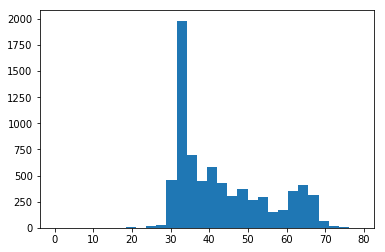

In [91]:
plt.hist(vr["GC%"], bins = 30)

In [93]:
vr["GC%"].mean()

43.230326854115724